In [1]:
# libraries
import sys
sys.path.append("../../models")
from functions import import_country
import pandas as pd 
import numpy as np 
import os 
import pickle as pkl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
from matplotlib import colors as clrs
import matplotlib.lines as lines
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['ytick.major.width'] = 0.3
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.width'] = 0.2
plt.rcParams['ytick.minor.width'] = 0.2
plt.rcParams['xtick.minor.size'] = 1.5
plt.rcParams['ytick.minor.size'] = 1.5

font_dirs = ['../fonts/Bai_Jamjuree/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Bai Jamjuree'
plt.rcParams['font.sans-serif'] = 'Bai Jamjuree'

colors = ['#6CC2BD', '#5A809E', '#7C79A2', '#F57D7C', '#FFC1A6', '#FEE4C4']
markers = ["o", "s", "^", "*", "P", "d"]
props = dict(facecolor='grey', alpha=0.1, linewidth=0.3)

import warnings
warnings.filterwarnings("ignore")

alpha_s   = [0, 0.1, 1, 10, 100]
countries = ["Egypt", "Serbia",  "Canada", "Peru", "Ukraine", "Italy"]
strategy  = "old_first"
rV        = 1.0 / 100

# import data 
with open("../../output/vaccine_hesitancy.pkl", "rb") as file: 
    data = pkl.load(file)  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


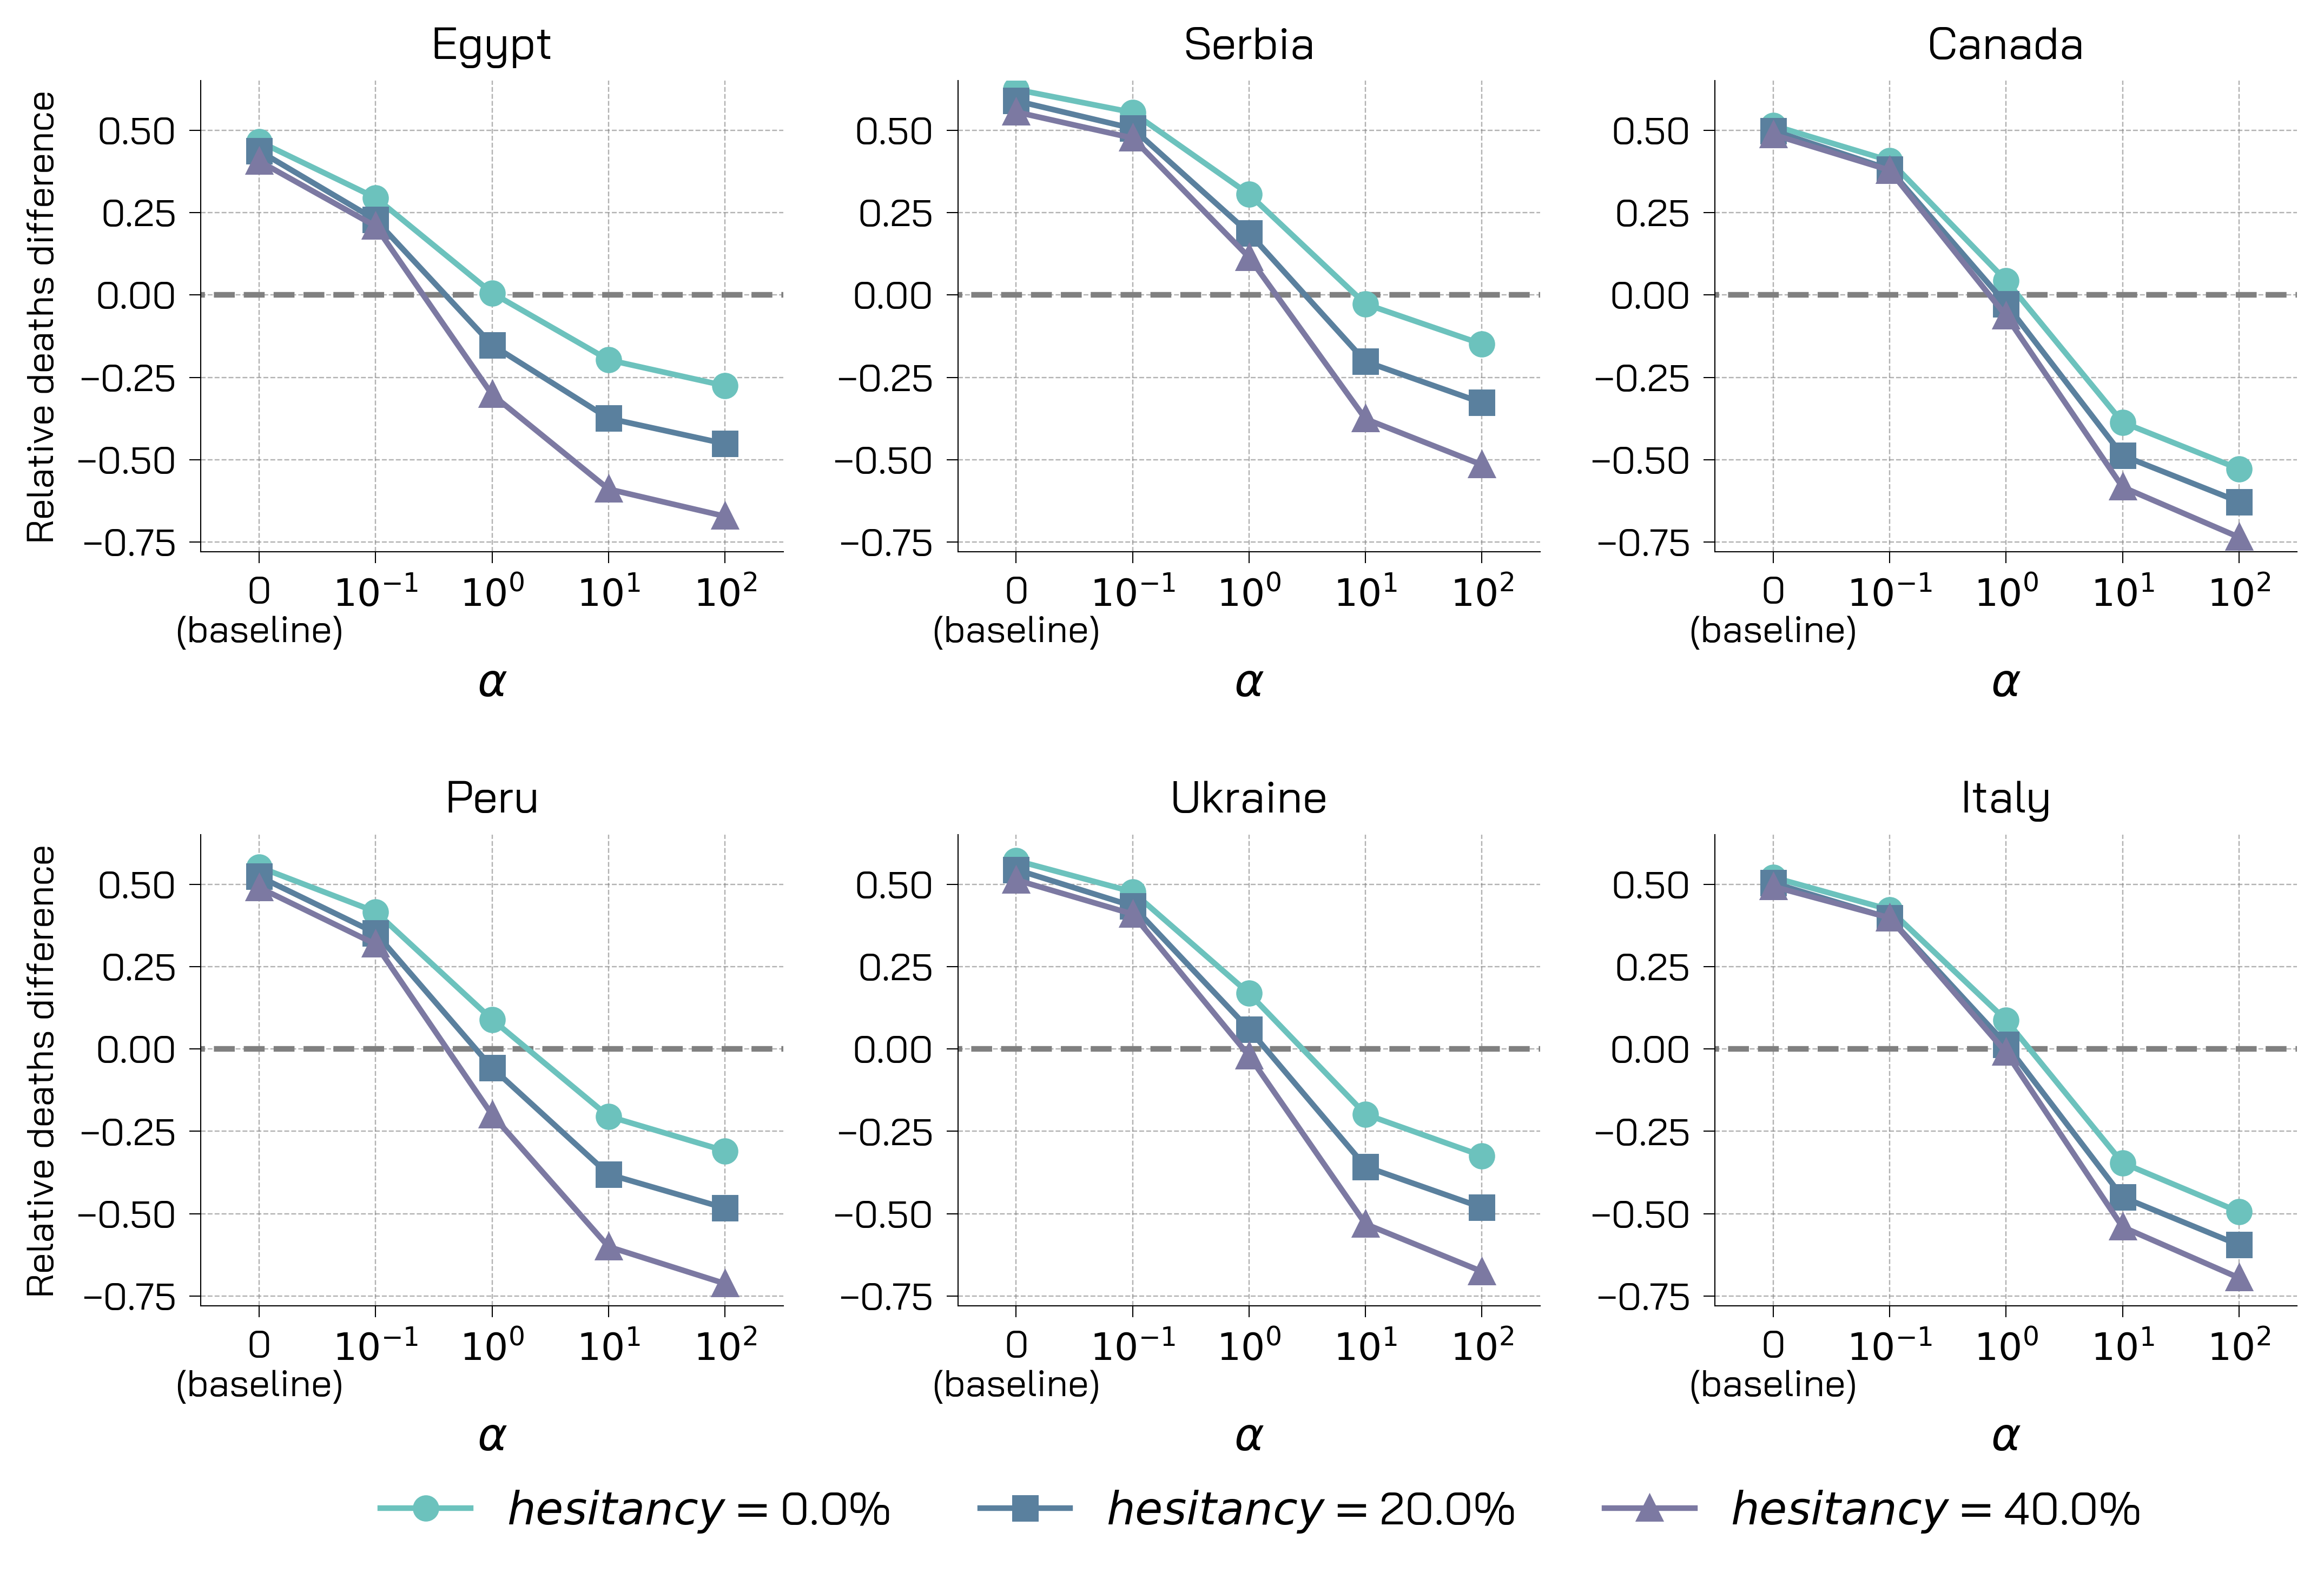

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6), dpi=500)
plt.subplots_adjust(hspace=0.6, wspace=0.3)

i, j = 0,0 
for country in countries:

    ax = axes[i,j]
    
    k = 0
    for hesitancy in [0.0, 0.2, 0.4]:
        ax.plot(range(len(alpha_s)), 
             data[country][hesitancy][strategy], color=colors[k], marker=markers[k], label="$hesitancy=$" + str(100 * hesitancy) + "%")
        
        k += 1

    ax.set_title(country)
    
    j += 1
    if j ==3:
        j = 0 
        i += 1
        
for ax in axes.ravel():
    ax.grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.hlines(0, -0.9, 4.5, linestyle="--", color="gray")
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.78, 0.65)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["0\n(baseline)", "$10^{-1}$", "$10^0$", "$10^1$", "$10^2$"], rotation=0, fontsize=10)
    ax.set_xlabel("$\\alpha$", fontsize=12)
    
axes[0,0].set_ylabel("Relative deaths difference")
axes[1,0].set_ylabel("Relative deaths difference")

axes[1, 2].legend(ncol=3, bbox_to_anchor=[0.8,-0.3,0,0], fontsize=12, frameon=False)
plt.savefig("./SM_img/vaccine_hesitancy.pdf", bbox_inches="tight")